<a href="https://colab.research.google.com/github/linhoangce/ml_with_pytorch_and_scikitlearn/blob/main/chapter4_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Identifying missing values in tabular data

In [1]:
!python --version

Python 3.11.13


In [2]:
import pandas as pd
from io import StringIO

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [3]:
# check for missing values per cell
# and return total number of missing values per col
df.isnull().sum()

,0
A,0
B,0
C,1
D,1


In [4]:
# `values` attribute returns NumPy array of a DataFrame
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [5]:
type(df.values)

numpy.ndarray

### Eliminating training examples or features with missing values

In [6]:
# drop entire rows with missing values
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
# drop cols with missing values
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [8]:
# only drop rows where all columns are NaN
# (returns the whole array here since we don't
# have a row with all values NaN)
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [9]:
# drop rwos that have fewer than 4 real values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
# only drop rows where NaN apeear in specific columns
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


### Inputing missing values

One of the most common interpolation techniques is **mean inputation**, where we simply replace missing values with the mean value of the entire column.

In [11]:
# mean imputation with SimpleImputer from scikit-learn
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [12]:
# alternatively, use `fillna` from DataFrame
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


## Handling categorical data

### Categorical data encoding with pandas

In [13]:
# create a sample dataframe
import pandas as pd

df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']
])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


### Mapping ordinal features

To makesure the learning algorithm interprets the ordinal features correctly, we need to convert the categorical string values into integers.

In [14]:
df['size']

,size
0,M
1,L
2,XL


In [15]:
# manual mapping for ordinal feature `size`
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [16]:
df['size']

,size
0,1
1,2
2,3


In [17]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
inv_size_mapping

{3: 'XL', 2: 'L', 1: 'M'}

In [18]:
# transform integer values back to original string representation
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

,size
0,M
1,L
2,XL


### Encoding class labels

In [19]:
import numpy as np

class_mapping = {label: idx for idx, label in
                 enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [20]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [21]:
# reverse encoded labels back to original
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [22]:
df['classlabel'].values

array(['class2', 'class1', 'class2'], dtype=object)

In [23]:
# a more convenient way: LabelEncode from scikit-learn
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()

# fit_transform takes an array as argument so convert df to np array
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [24]:
# transform integer class labels back to original
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

### Performing one-hot encoding on nomial features

In [25]:
X = df[['color', 'size', 'price']].values
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [26]:
X[:, 0]

array(['green', 'red', 'blue'], dtype=object)

In [27]:
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [28]:
X[:, 0].reshape(-1, 1)

array([[1],
       [2],
       [0]], dtype=object)

In [29]:
X[:, 0]

array([1, 2, 0], dtype=object)

In [30]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [31]:
# One hot encode blue=1
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [32]:
# selectively transform columns in a multi-feature array
# modify only the first column
# leave other two columns untouched via 'passthrough' arg
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [33]:
# a more convenient way to create dummy features via one-hot encoding
# use `get_dumies` method implemented in pandas.
# only convert string columns and leave other columns unchanged
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,False,True,False
1,13.5,2,False,False,True
2,15.3,3,True,False,False


In [34]:
pd.get_dummies(df[['price', 'color', 'size']], dtype=int)

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


When we are using one-hot encodeing datasets, we have to keep in mind that this introdices multi-collinearity, which can be an issue for certain methods (for instance, methods that require matrix inversion). If features are highly correlated, matrices are computationally difficult to invert, which can lead to numerically unstable estimates. To reduce the correlation among variables, we can simply remove one feature column from the one-hot encoded array. We do not lose any important information by removing a feature column, though; for example, if we remove the column `color_blue`, the feature information ist still preserved since we observe `color_green=0` and `color_red=0`, it implies that the observation must be `blue.

In [35]:
# drop the first col
pd.get_dummies(df[['price', 'size', 'color']],
               drop_first=True)

,price,size,color_green,color_red
0,10.1,1,True,False
1,13.5,2,False,True
2,15.3,3,False,False


In [36]:
# drop col via OneHotEncoder
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([
    ('onehot', color_ohe, [0]),
     ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

### Optional: encoding ordinal features

In [37]:
 df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                    ['red', 'L', 13.5, 'class1'],
                    ['blue', 'XL', 15.3,'class2']])
 df

,0,1,2,3
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [38]:
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [39]:
# encode variables uisng value-threshold approach
# with custom lambda expression
df['x > M'] = df['size'].apply(
    lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(
    lambda x: 1 if x == 'XL' else 0)

del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


## Partitioning a dataset into separate training and test datasets

In [40]:
# download the Wine dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [41]:
print(f"Number of samples: {len(df_wine)}")

Number of samples: 178


In [42]:
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']
print(f"Class label {np.unique(df_wine['Class label'])}")

Class label [1 2 3]


In [43]:
df_wine.iloc[:, 1:].values

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [44]:
df_wine.iloc[:, 0].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [45]:
# partition into train and test datasets
from sklearn.model_selection import train_test_split

# get features and labels arrays
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=0,
    stratify=y # ensure both training and test datasets have same class proportions as original datasets
)

## Bringing features onto the same scale

In [46]:
X_train[:2], X_test[:2]

(array([[1.362e+01, 4.950e+00, 2.350e+00, 2.000e+01, 9.200e+01, 2.000e+00,
         8.000e-01, 4.700e-01, 1.020e+00, 4.400e+00, 9.100e-01, 2.050e+00,
         5.500e+02],
        [1.376e+01, 1.530e+00, 2.700e+00, 1.950e+01, 1.320e+02, 2.950e+00,
         2.740e+00, 5.000e-01, 1.350e+00, 5.400e+00, 1.250e+00, 3.000e+00,
         1.235e+03]]),
 array([[1.377e+01, 1.900e+00, 2.680e+00, 1.710e+01, 1.150e+02, 3.000e+00,
         2.790e+00, 3.900e-01, 1.680e+00, 6.300e+00, 1.130e+00, 2.930e+00,
         1.375e+03],
        [1.217e+01, 1.450e+00, 2.530e+00, 1.900e+01, 1.040e+02, 1.890e+00,
         1.750e+00, 4.500e-01, 1.030e+00, 2.950e+00, 1.450e+00, 2.230e+00,
         3.550e+02]]))

In [47]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

In [48]:
X_train_norm[:2], X_test_norm[:2]

(array([[0.64619883, 0.83201581, 0.4248366 , 0.46236559, 0.27160494,
         0.35172414, 0.09704641, 0.68      , 0.18987342, 0.23623446,
         0.45744681, 0.28571429, 0.19400856],
        [0.6871345 , 0.15612648, 0.65359477, 0.43548387, 0.7654321 ,
         0.67931034, 0.50632911, 0.74      , 0.2943038 , 0.3250444 ,
         0.81914894, 0.63369963, 0.68259629]]),
 array([[0.81547619, 0.26954178, 0.84615385, 0.39634146, 0.41975309,
         0.69090909, 0.70731707, 0.44897959, 0.44250871, 0.53404255,
         0.5042735 , 0.62357414, 0.90987124],
        [0.33928571, 0.14824798, 0.75      , 0.51219512, 0.28395062,
         0.28727273, 0.3902439 , 0.57142857, 0.21602787, 0.17765957,
         0.77777778, 0.35741445, 0.03433476]]))

**Normalization**: rescaling of features to a range of [0, 1], which is a special case of **min-max scaling**.

*x_norm = (x - x_min) / (x_max - x_min)*

**Standardization**: more practical for optimization algorithms such as gradient descent. The reason is that many linear models, such as the logistic regression and SVM initialize the weights to 0 or small random values close to 0. Using standardization, we center the featyre columns at mean 0 with stardard deviation 1 so that the feature columns have the same parameters as a standard normal distribution (zero mean and unit variance), which makes it easier to learn the weights.

However, standardization does not change the shape of the distribution, and it does not transform non-normally distributed data into normally distributed data. In addition to scaling data such that it has zero mean and unit variance, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values.

*x_std = (x - mean(X)) / std(X)*

In [49]:
# perform standardization and normalization
ex = np.array([0, 1, 2, 3, 4, 5])
print(f'standardized: {(ex - ex.mean()) / ex.std()}')
print(f'normalized: {(ex - ex.min()) / (ex.max() - ex.min())}')

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [50]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [51]:
X_train[:1], X_test[:1], X_train_norm[:1], X_test_norm[:1], X_train_std[:1], X_test_std[:1]

(array([[1.362e+01, 4.950e+00, 2.350e+00, 2.000e+01, 9.200e+01, 2.000e+00,
         8.000e-01, 4.700e-01, 1.020e+00, 4.400e+00, 9.100e-01, 2.050e+00,
         5.500e+02]]),
 array([[1.377e+01, 1.900e+00, 2.680e+00, 1.710e+01, 1.150e+02, 3.000e+00,
         2.790e+00, 3.900e-01, 1.680e+00, 6.300e+00, 1.130e+00, 2.930e+00,
         1.375e+03]]),
 array([[0.64619883, 0.83201581, 0.4248366 , 0.46236559, 0.27160494,
         0.35172414, 0.09704641, 0.68      , 0.18987342, 0.23623446,
         0.45744681, 0.28571429, 0.19400856]]),
 array([[0.81547619, 0.26954178, 0.84615385, 0.39634146, 0.41975309,
         0.69090909, 0.70731707, 0.44897959, 0.44250871, 0.53404255,
         0.5042735 , 0.62357414, 0.90987124]]),
 array([[ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
         -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
         -0.20017028, -0.82164144, -0.62946362]]),
 array([[ 1.09517886, -0.40674741,  1.26476181, -0.52362169,  0.94557352,
         

### L1 and L2 regularization as penalties against model complexity

In [52]:
# set L1 regularization for model
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(penalty='l1',
                        C=0.1,
                        solver='liblinear',
                        multi_class='ovr')

# C=1. is the default
# We can increase or decrease it to make
# regularization effect stronger or weakear
lm.fit(X_train_std, y_train)
print(f"Training accuracy: {lm.score(X_train_std, y_train)}")
print(f'Test accuracy: {lm.score(X_test_std, y_test)}')

Training accuracy: 0.9596774193548387
Test accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [53]:
# in scikit-learn, intercept_ is biases, coef_ is weights
lm.intercept_

array([-0.31882049, -0.09905957, -0.81381518])

In [54]:
lm.coef_

array([[ 0.21943853,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54250329,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.51479702],
       [-0.76580194, -0.04081125,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.82422003,
         0.006667  ,  0.06476782, -0.41584266],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.74428839,  0.        ,  0.        ,  0.43001702,
        -0.31928113, -0.51872049,  0.        ]])

In [55]:
np.arange(-4., 6.)

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [56]:
10**np.arange(-4., 6.)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05])

In [57]:
lm.coef_[1], lm.coef_.shape

(array([-0.76580194, -0.04081125,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.82422003,
         0.006667  ,  0.06476782, -0.41584266]),
 (3, 13))

In [58]:
df_wine.columns[0], df_wine.columns[1], df_wine.columns[10]

('Class label', 'Alcohol', 'Color intensity')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

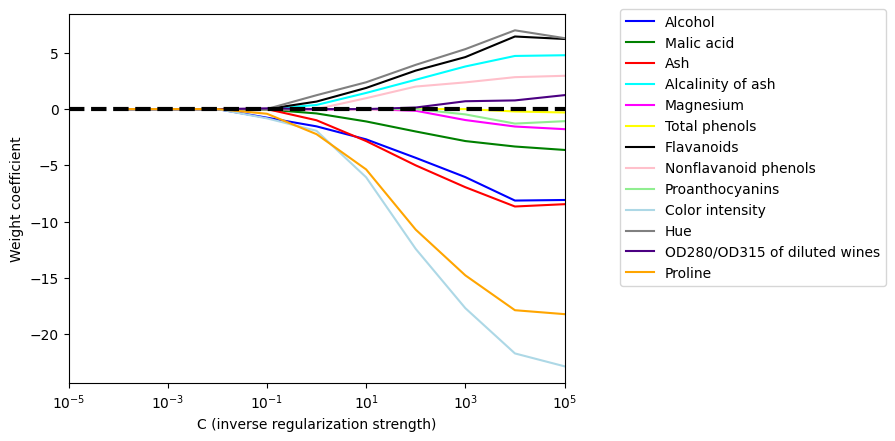

In [59]:
# Vary regularization strength and plot reg path
# weight coefficients of the different features for
# different regularization strengths
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors =  ['blue', 'green', 'red', 'cyan',
           'magenta', 'yellow', 'black',
           'pink', 'lightgreen', 'lightblue',
           'gray', 'indigo', 'orange']

weights, params = [], []

for c in np.arange(-4., 6.):
  lr = LogisticRegression(penalty='l1',
                          C=10.**c,
                          solver='liblinear',
                          multi_class='ovr',
                          random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:, column],
           label=df_wine.columns[column + 1],
           color=color)

# draw a black horizontal line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

### Sequential feature selection algorithms

**Dimensionality reductions** via feature selection a way to reduce the complexity of the model and avoid model overfitting, useful for unregularized models.

* Two main categories: **feature selection** and **feature extraction**

Sequential feature selection algorithms are a family of greedy search algorithms that are used to
reduce an initial d-dimensional feature space to a k-dimensional feature subspace where `k < d`. The
motivation behind feature selection algorithms is to automatically select a subset of features that are
most relevant to the problem, to improve computational efficiency, or to reduce the generalization
error of the model by removing irrelevant features or noise, which can be useful for algorithms that
don’t support regularization.

A classic sequential feature selection algorithm is sequential backward selection (SBS), which aims to
reduce the dimensionality of the initial feature subspace with a minimum decay in the performance
of the classifier to improve upon computational efficiency. In certain cases, SBS can even improve
the predictive power of the model if a model suffers from overfitting

Outline of SBS:
1. Initialize the algorithm with `k = d`, where *k* is the dimensionality of the full feature space, *X_d*.
2. Determine teh feature *x_*, that maximines the criterion: *`x_ = argmax(X_k - x)`, where x is a member of X_k.
3. Remove the feature *x_* from the feature set: `X_k-1 = X_k - x_; k = k-1`
4. Terminate if *k* equals the number of desired features; otherwise, go to step 2.

In [60]:
X_train.shape[1]

13

In [67]:
indices = tuple(range(X_train.shape[1]))
subsets = [indices]
subsets

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)]

In [68]:
for p in combinations(indices, r=X_train.shape[1] - 1):
  print(p)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12)
(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12)
(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12)
(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)
(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)
(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)
(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)


In [69]:
X_train[:, indices]

array([[1.362e+01, 4.950e+00, 2.350e+00, ..., 9.100e-01, 2.050e+00,
        5.500e+02],
       [1.376e+01, 1.530e+00, 2.700e+00, ..., 1.250e+00, 3.000e+00,
        1.235e+03],
       [1.373e+01, 1.500e+00, 2.700e+00, ..., 1.190e+00, 2.710e+00,
        1.285e+03],
       ...,
       [1.388e+01, 5.040e+00, 2.230e+00, ..., 5.800e-01, 1.330e+00,
        4.150e+02],
       [1.196e+01, 1.090e+00, 2.300e+00, ..., 9.900e-01, 3.130e+00,
        8.860e+02],
       [1.270e+01, 3.870e+00, 2.400e+00, ..., 1.190e+00, 3.130e+00,
        4.630e+02]])

In [70]:
# Implement Sequential backward selection
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS:
  def __init__(self, estimator, k_features,
               scoring=accuracy_score,
               test_size=0.25, random_state=1):
    self.scoring = scoring
    self.estimator = clone(estimator)
    self.k_features = k_features
    self.test_size = test_size
    self.random_state = random_state

  def fit(self, X, y):
    X_train, X_test, y_train, y_test = \
      train_test_split(X, y,
                       test_size=self.test_size,
                       random_state=self.random_state)

    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]
    score = self._calc_score(X_train,
                             y_train,
                             X_test,
                             y_test,
                             self.indices_)
    self.scores_ = [score]

    while dim > self.k_features:
      scores = []
      subsets = []

      for p in combinations(self.indices_, r=dim - 1):
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test,
                                 p)
        scores.append(score)
        subsets.append(p)

      best = np.argmax(scores)
      self.indices_ = subsets[best]
      self.subsets_.append(self.indices_)
      dim -= 1

      self.scores_.append(scores[best])

    # store the score of the final subset
    # representing the "best" among subsets with self.k_features
    self.k_score_ = self.scores_[-1]

    return self

  def transform(self, X):
    return X[:, self.indices_]

  def _calc_score(self,
                  X_train, y_train,
                  X_test, y_test,
                  indices):
    self.estimator.fit(X_train[:, indices],
                       y_train)
    y_pred = self.estimator.predict(X_test[:, indices])
    score = self.scoring(y_test, y_pred)

    return score

In [71]:
# implement SBS using KNN classifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

Although our SBS implementation already splits the dataset into a stest and training dataset inside the `fit` function, we still fed the training dataset, `X_train`, to the algorithm, The SBS `fit` method will then create new training subsets for testing and training. This approach is necessary to prevent our *original* test set from becoming part of training data.


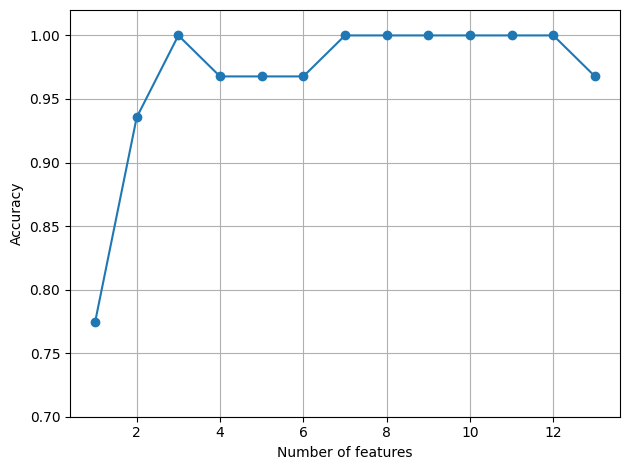

In [72]:
# plot the implementation
k_feature = [len(k) for k in sbs.subsets_]
plt.plot(k_feature, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [73]:
# let's see what smallest features subset k=3
# having performance accuracy=100%
# obtain column indices from three-feature subset
# from the 11th position in sbs.subsets_ attr
k3 = list(sbs.subsets_[10])
k3

[0, 1, 11]

In [74]:
df_wine.columns[1:]

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [75]:
df_wine.columns[1:][k3]

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')

#### Evaluate performance of KNN classifier on original test set


In [76]:
# first, evaluate on complete feature set
knn.fit(X_train_std, y_train)
print(f"Training accuracy: {knn.score(X_train_std, y_train)}")
print(f"Test accuracy: {knn.score(X_test_std, y_test)}")

Training accuracy: 0.967741935483871
Test accuracy: 0.9814814814814815


In [77]:
# evaluate on selected three-feature subset
knn.fit(X_train_std[:, k3], y_train)
print(f"Training accuracy: {knn.score(X_train_std[:, k3], y_train)}")
print(f"Test accuracy: {knn.score(X_test_std[:, k3], y_test)}")

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


### Assessing feature importance with random forests

**Random forest** is a useful approach for selecting relevant features from a dataset, which can be used to measure the feature importance as the averaged impurity decrease computed from all decision trees in the forest, without making any assumptions about whether data is linearly separable or not.

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


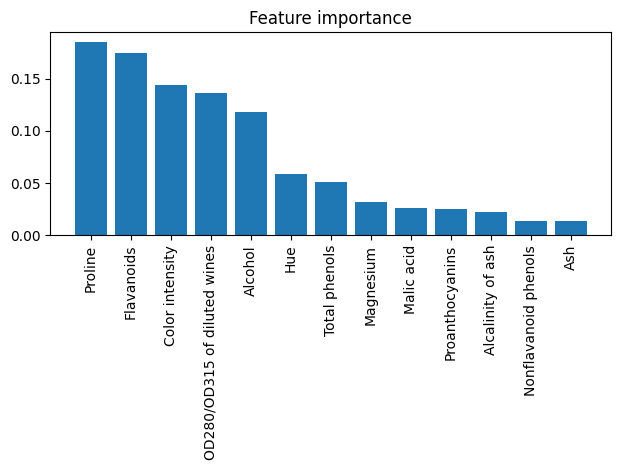

In [81]:
# train forest of 500 trees on the Wine dataset
# rank 13 features by their respective importance measure
# no need for standardization/normalization of features
# feature importance values are normalized summed to 1.0
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30,
                          feat_labels[indices[f]],
                          importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices],
           rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [82]:
# set `threshold=0.1` to reduce dataset to five most important features
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest,
                      threshold=0.1,
                      prefit=True)
X_selected = sfm.transform(X_train)
print(f"Number of features that meet this threshold criterion: {X_selected.shape[1]}")

for f in range(X_selected.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30,
                          feat_labels[indices[f]],
                          importances[indices[f]]))

Number of features that meet this threshold criterion: 5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
